## Import all packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels
import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
from datetime import date
import math
import random
import swifter

## Import data sets

In [10]:
#read in the data

chi_data = pd.read_csv("chicago_2017.csv")
chi_weather = pd.read_csv("weather_hourly_chicago.csv")

## General information about the raw data

### chicago_2017 data set

In [5]:
#chi_data.info()

In [6]:
#chi_data.describe()

In [ ]:
#chi_data.head()

### weather_hourly_chicago data set

In [8]:
#chi_weather.info()

In [ ]:
#chi_weather.describe()

In [ ]:
#chi_data.head()

# Data collection and preparation

## Add date time features to chi_data

In [12]:
chi_data['start_time']= pd.to_datetime(chi_data['start_time'])

In [14]:
chi_data['end_time'] = pd.to_datetime(chi_data['end_time'])

In [16]:
chi_data.sort_values(['start_time'], inplace = True) #Sorts the values by date 

In [17]:
chi_data["Date"] = chi_data['start_time'].swifter.apply(lambda dt: dt.date())

In [18]:
chi_data["Month"] = chi_data['start_time'].swifter.apply(lambda dt: dt.month)

In [19]:
chi_data["Week"] = chi_data['start_time'].swifter.apply(lambda dt: dt.isocalendar()[1])

In [21]:
chi_data["Hour"] = chi_data['start_time'].swifter.apply(lambda dt: dt.hour)

In [22]:
chi_data["Weekday"] = chi_data['start_time'].swifter.apply(lambda dt: dt.weekday())

In [24]:
chi_data['Duration'] = (chi_data['end_time']-chi_data['start_time'])

In [60]:
chi_data["Duration_sec"] = chi_data["Duration"].swifter.apply(lambda x: x.total_seconds())

In [62]:
#chi_data.head()

## Add date time features to chi_data

In [96]:
chi_weather['date_time']=pd.to_datetime(chi_weather['date_time'])

In [97]:
first_date = datetime(year=2017, day=1, month=1)
last_date = datetime(year=2017, day=31, month=12)
chi_weather_2017 = chi_weather[(chi_weather['date_time']>=first_date)&(chi_weather["date_time"] <= last_date)]

In [ ]:
chi_weather_2017.sort_values(by = "date_time", inplace = True) #sort the values by date time

In [101]:
chi_weather_2017["Date"] = chi_weather_2017['date_time'].swifter.apply(lambda dt: dt.date())

<ipython-input-101-ff4fd3b3eea8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_weather_2017["Date"] = chi_weather_2017['date_time'].swifter.apply(lambda dt: dt.date())


In [99]:
chi_weather_2017['Month']= chi_weather_2017["date_time"].swifter.apply(lambda dt: dt.month)

<ipython-input-99-215697950b0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_weather_2017['Month']= chi_weather_2017["date_time"].swifter.apply(lambda dt: dt.month)


In [100]:
chi_weather_2017["Week"] = chi_weather_2017['date_time'].swifter.apply(lambda dt: dt.isocalendar()[1])

<ipython-input-100-c5b233e3b0fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_weather_2017["Week"] = chi_weather_2017['date_time'].swifter.apply(lambda dt: dt.isocalendar()[1])


In [102]:
chi_weather_2017["Hour"] = chi_weather_2017['date_time'].swifter.apply(lambda dt: dt.hour)

<ipython-input-102-414bd7212e72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_weather_2017["Hour"] = chi_weather_2017['date_time'].swifter.apply(lambda dt: dt.hour)


In [ ]:
chi_weather_2017["Hour"] = chi_weather_2017['date_time'].swifter.apply(lambda dt: dt.hour)

# Descriptive analystics

## Fleet size

In [29]:
bikes = len(chi_data['bike_id'].unique())
print("The overall number of bikes is {}".format(bikes))

The overall number of bikes is 6243


## Temporal demand patterns

### Bike rentals

#### Bike rentals per month

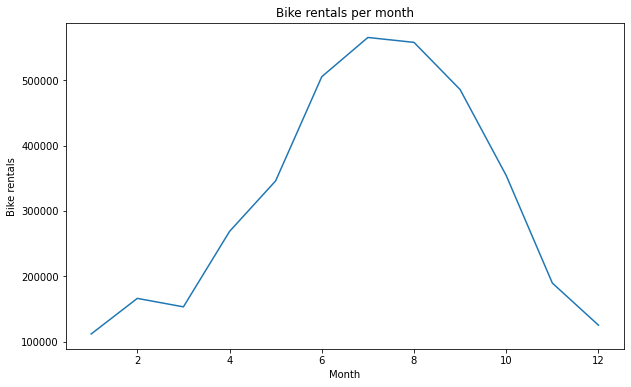

In [90]:
rentals_month = chi_data.groupby(['Month'])['bike_id'].count()
rentals_month = pd.DataFrame(rentals_month)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(rentals_month)
ax.set_title('Bike rentals per month')
ax.set_xlabel('Month')
ax.set_ylabel("Bike rentals")
plt.show()

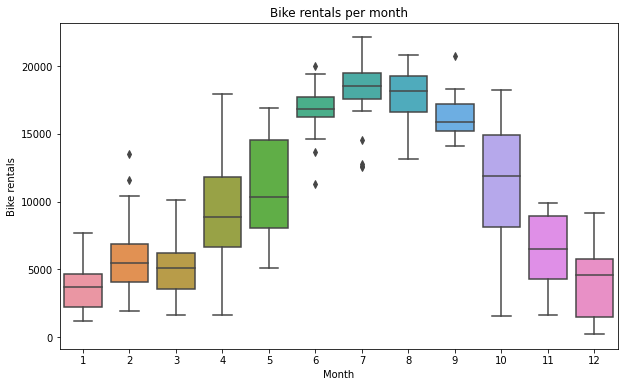

In [87]:
rentals_month_bp = chi_data.groupby(['Date','Month'])['bike_id'].count()
rentals_month_bp = pd.DataFrame(rentals_month_bp)

fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(x = rentals_month_bp.index.get_level_values('Month'), y =rentals_month_bp['bike_id'], ax = ax)
ax.set_title('Bike rentals per month')
ax.set_ylabel("Bike rentals")
plt.show()

#### Bike rentals per week

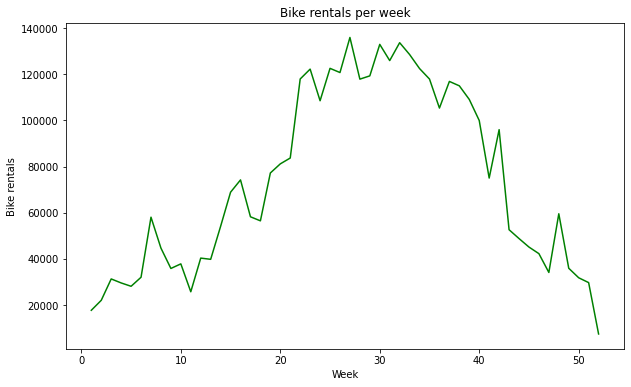

In [48]:
rentals_week = chi_data.groupby("Week")['bike_id'].count()
rentals_week = pd.DataFrame(rentals_week)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(rentals_week, c = "green")

ax.set_title('Bike rentals per week')
ax.set_ylabel("Bike rentals")
ax.set_xlabel("Week")
plt.show()

#### Bike rentals per weekday

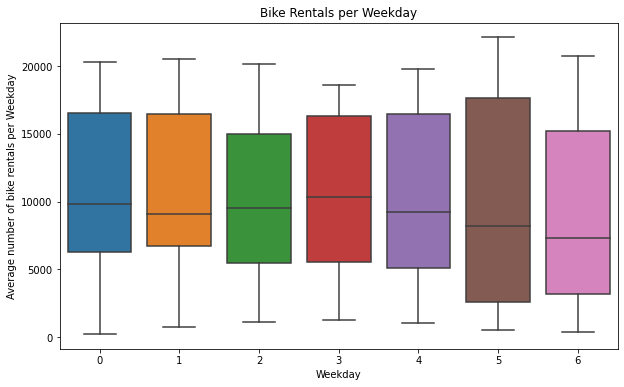

In [46]:
rentals_weekday = chi_data.groupby(['Weekday','Date'])['bike_id'].count()
rentals_weekday = pd.DataFrame(rentals_weekday)

fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(x = rentals_weekday.index.get_level_values('Weekday'), y =rentals_weekday['bike_id'], ax = ax)
ax.set_title('Bike rentals per weekday')
ax.set_ylabel("Bike rentals")

plt.show()

In [47]:
# legende Zahl - Wochentag

#### Bike rentals over year per day 

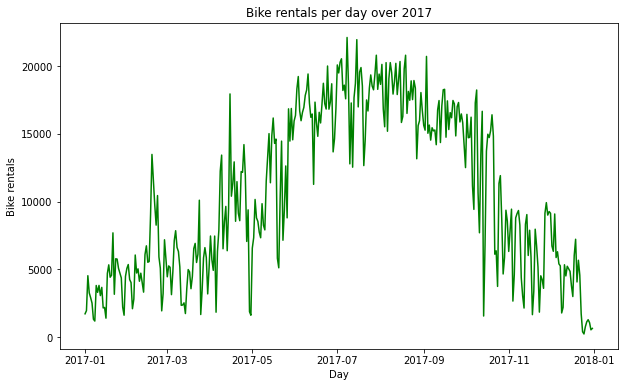

In [32]:
rentals_day = chi_data.groupby("Date")['bike_id'].count()
rentals_day = pd.DataFrame(rentals_day)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(rentals_day, c = "green")

ax.set_title('Bike rentals per day')
ax.set_ylabel("Bike rentals")
ax.set_xlabel("Day")
plt.show()

#### Bike rentals per hour

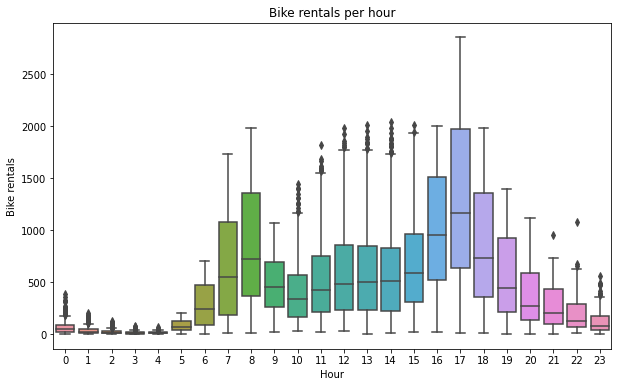

In [36]:
rentals_hour = chi_data.groupby(["Date","Hour"])['bike_id'].count()
rentals_hour =pd.DataFrame(rentals_hour)

fig, ax = plt.subplots(figsize = (10,6))


sns.boxplot(x = rentals_hour.index.get_level_values("Hour"), y =rentals_hour['bike_id'], ax = ax)
ax.set_title('Bike rentals per hour')
ax.set_ylabel("Bike rentals")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

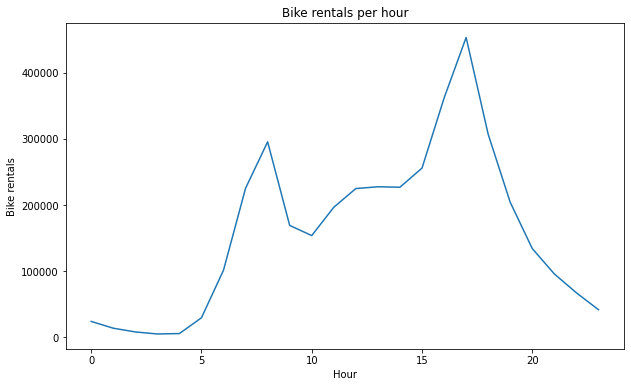

In [38]:
rentals_hour = chi_data.groupby(['Hour'])['bike_id'].count()
rentals_hour = pd.DataFrame(rentals_hour)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(rentals_hour)
ax.set_title('Bike rentals per hour')
ax.set_ylabel("Bike rentals")
ax.set_xlabel("Hour")
plt.show

### Duration/Travel time

#### Duration per week

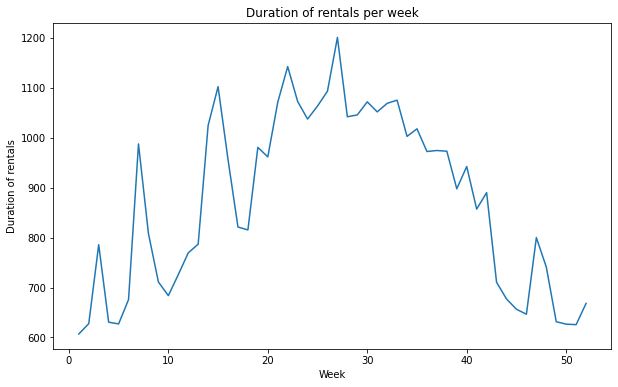

In [94]:
duration_week = chi_data.groupby("Week")["Duration_sec"].mean()
duration_week = pd.DataFrame(duration_week)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(duration_week)

ax.set_title('Duration of rentals per week')
ax.set_ylabel('Duration of rentals')
ax.set_xlabel('Week')
plt.show()

#### Duration per weekday

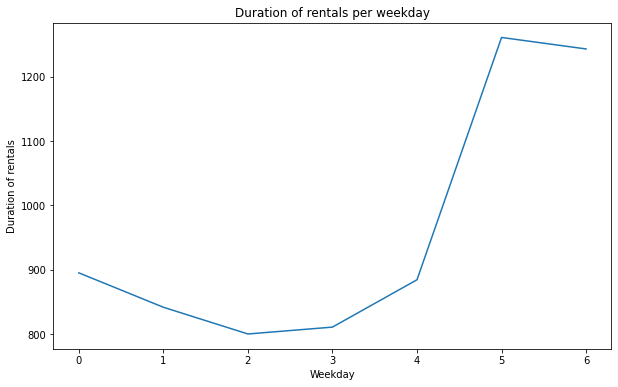

In [93]:
duration_weekday = chi_data.groupby("Weekday")["Duration_sec"].mean()
duration_weekday = pd.DataFrame(duration_weekday)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(duration_weekday)

ax.set_title('Duration of rentals per weekday')
ax.set_ylabel('Duration of rentals')
ax.set_xlabel('Weekday')
plt.show()

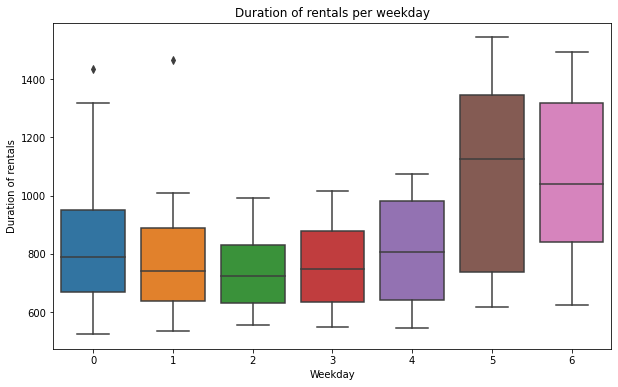

In [92]:
duration_weekday_bp = chi_data.groupby(["Date","Weekday"])['Duration_sec'].mean()
duration_weekday_bp =pd.DataFrame(duration_weekday_bp)

fig, ax = plt.subplots(figsize = (10,6))


sns.boxplot(x = duration_weekday_bp.index.get_level_values("Weekday"), y =duration_weekday_bp['Duration_sec'], ax = ax)
ax.set_title('Duration of rentals per weekday')
ax.set_ylabel('Duration of rentals')
plt.show()

#### Duration per hour

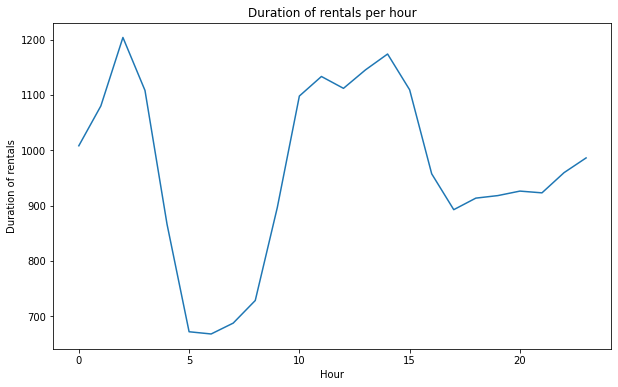

In [91]:
duration_hour = chi_data.groupby("Hour")["Duration_sec"].mean()
duration_hour = pd.DataFrame(duration_hour)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(duration_hour)

ax.set_title('Duration of rentals per hour')
ax.set_ylabel('Duration of rentals')
ax.set_xlabel('Hour')
plt.show()

### Weather